In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("ca_house_price.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()/len(df)*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [6]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mode()[0])

In [7]:
df['total_bedrooms']=df['total_bedrooms'].astype("int")

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
num_cols=df.select_dtypes(include=['int','float']).columns
num_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

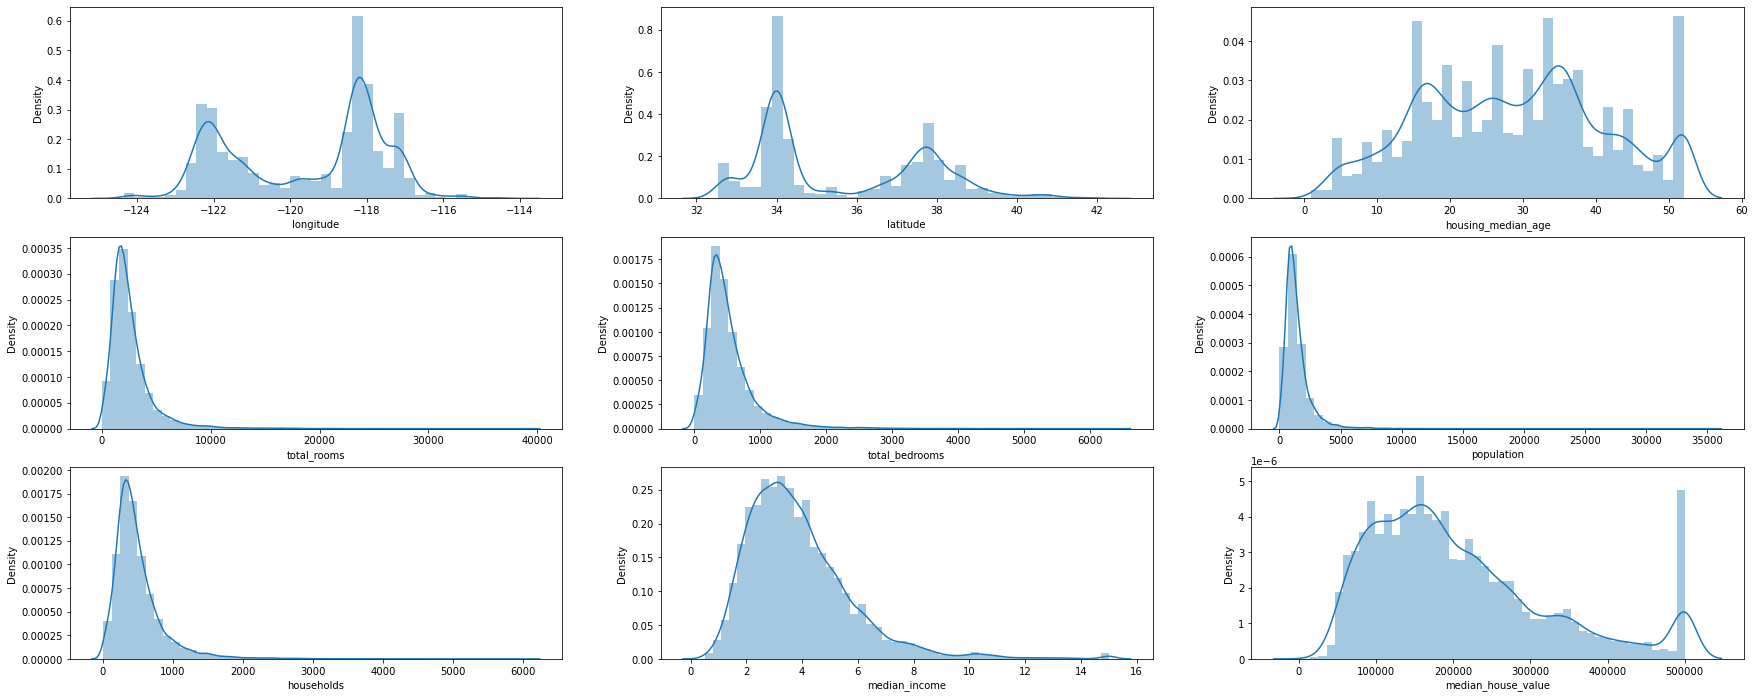

In [10]:
plt.figure(figsize=(30,12))
count=1
for i in num_cols:
    plt.subplot(3,3,count)
    sns.distplot(df[i])
    count+=1

In [11]:
for i in num_cols:
    if i not in df.iloc[:,0:3].columns:
        df[i]=np.sqrt(df[i])

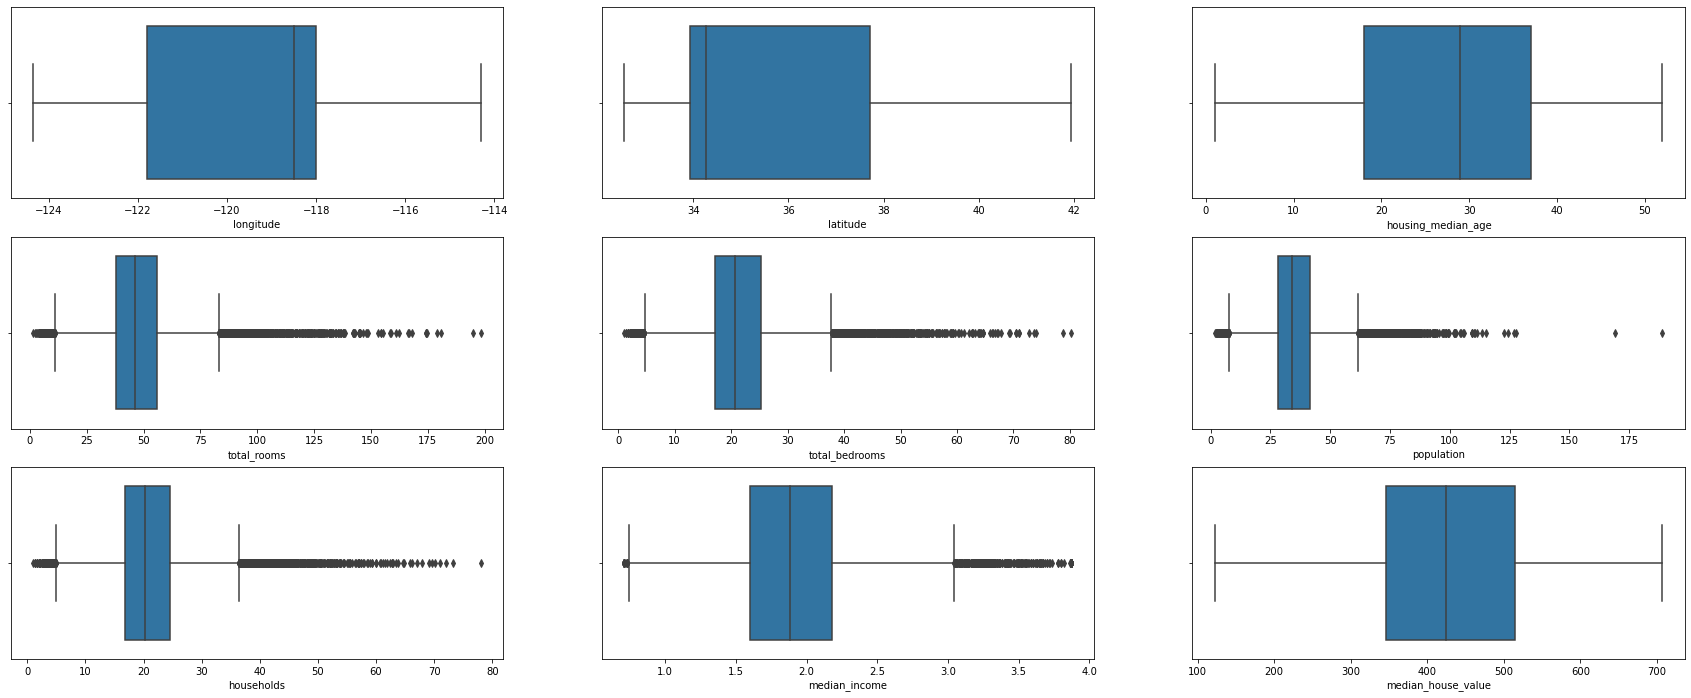

In [12]:
plt.figure(figsize=(30,12))
count=1
for i in num_cols:
    plt.subplot(3,3,count)
    sns.boxplot(df[i])
    count+=1

In [13]:
df=df[(df['total_rooms']<80)&(df['total_rooms']>10)]

In [14]:
df=df[(df['total_bedrooms']<38)&(df['total_bedrooms']>5)]

In [15]:
df=df[(df['population']<58)&(df['total_bedrooms']>15)]

In [16]:
df=df[(df['households']<34)&(df['households']>7)]

In [17]:
df=df[(df['median_income']<3)&(df['median_income']>0.5)]

In [18]:
df['rooms_per_household']=df['total_rooms']/df['households']
df['bedrooms_per_room']=df['total_bedrooms']/df['total_rooms']
df['population_per_household']=df['population']/df['households']

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
3,-122.25,37.85,52,35.693137,15.329710,23.622024,14.798649,2.375521,NEAR BAY,584.208867,2.411919,0.429486,1.596228
4,-122.25,37.85,52,40.336088,16.733201,23.769729,16.093477,1.961173,NEAR BAY,584.978632,2.506363,0.414844,1.476979
6,-122.25,37.84,52,50.348784,22.113344,33.075671,22.671568,1.912877,NEAR BAY,546.991773,2.220790,0.439203,1.458905
7,-122.25,37.84,52,55.713553,26.210685,34.014703,25.436195,1.766352,NEAR BAY,491.324740,2.190326,0.470454,1.337256
8,-122.26,37.84,42,50.547008,25.787594,34.727511,24.392622,1.442359,NEAR BAY,476.130234,2.072225,0.510171,1.423689


<AxesSubplot:>

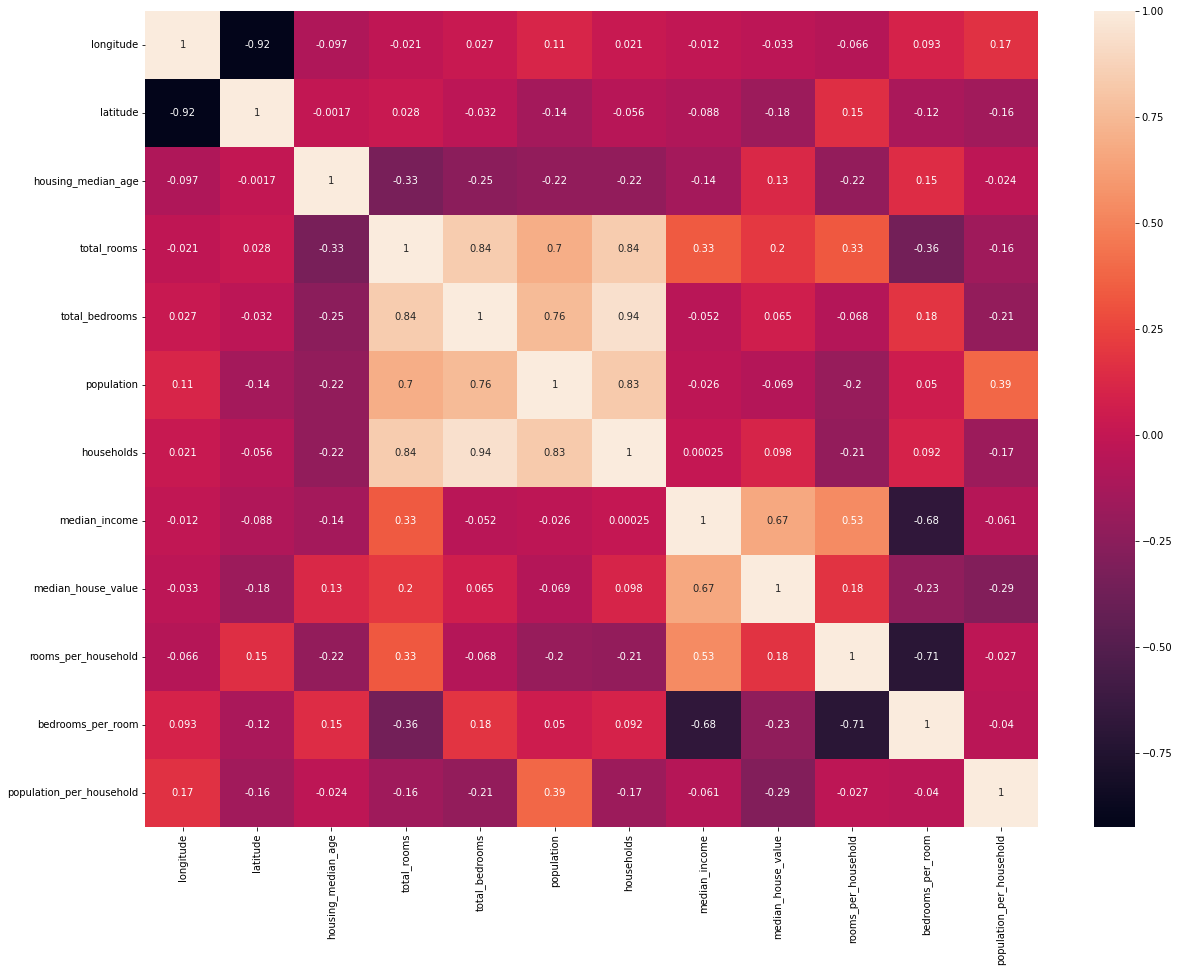

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [21]:
df['ocean_proximity'].value_counts()

<1H OCEAN     7259
INLAND        4990
NEAR OCEAN    2153
NEAR BAY      1792
ISLAND           4
Name: ocean_proximity, dtype: int64

In [22]:
df=pd.get_dummies(data=df,columns=['ocean_proximity'],drop_first=True)

In [23]:
x=df.drop('median_house_value',axis=1)

In [24]:
x.shape

(16198, 15)

In [25]:
y=df['median_house_value']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [29]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
model1=LinearRegression()
model2=RandomForestRegressor()
model3=GradientBoostingRegressor()
model4=XGBRegressor()
model5=SVR(kernel='linear')

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
def my_model(model):
    print("Algorithm:",model)
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print("Train Data")
    print("R2 Score:",r2_score(y_train,y_pred_train))
    print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print("Test Data")
    print("R2 Score:",r2_score(y_test,y_pred_test))
    print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_test)))

In [44]:
my_model(model1)

Algorithm: LinearRegression()
Train Data
R2 Score: 0.7055192653651714
RMSE: 64.14011470939425
Test Data
R2 Score: 0.7039562681019035
RMSE: 64.52565882992126


In [45]:
my_model(model2)

Algorithm: RandomForestRegressor()
Train Data
R2 Score: 0.9763004352812515
RMSE: 18.195813345277553
Test Data
R2 Score: 0.8388753147382461
RMSE: 47.60313482783048


In [46]:
my_model(model3)

Algorithm: GradientBoostingRegressor()
Train Data
R2 Score: 0.8224035064146198
RMSE: 49.81022251386201
Test Data
R2 Score: 0.8176293148480221
RMSE: 50.644469617757906


In [47]:
my_model(model4)

Algorithm: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
Train Data
R2 Score: 0.9525968571537187
RMSE: 25.733855418683586
Test Data
R2 Score: 0.8537905598491407
RMSE: 45.34633786188416


In [48]:
my_model(model5)

Algorithm: SVR(kernel='linear')
Train Data
R2 Score: 0.6998648889517003
RMSE: 64.75296962903884
Test Data
R2 Score: 0.6993135959267551
RMSE: 65.02964873063814
